In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

## Setup

In [11]:
# Load the dataset
file_path = Path('Resources/encoded_tickets_2024_09_selected.csv')
df = pd.read_csv(file_path)

In [12]:
# View summary of columns
df

,WEEKEND,ISSUING_AGENCY_NAME,GENERAL_VIOLATION_CATEGORY,NEIGHBORHOOD,PLATE_STATE,PERIOD_OF_DAY
0,1,15,3,27,0,2
1,1,15,4,36,0,2
2,1,15,4,36,0,3
3,1,15,4,36,0,3
4,1,15,4,36,0,3
...,...,...,...,...,...,...
97473,0,1,3,3,0,4
97474,0,1,2,3,0,4
97475,0,1,4,3,0,4
97476,0,1,2,3,0,4


In [13]:
# Define features (X) and target variable (y)
X = df[['WEEKEND', 'ISSUING_AGENCY_NAME', 'NEIGHBORHOOD', 'PLATE_STATE', 'PERIOD_OF_DAY']]
y = df['GENERAL_VIOLATION_CATEGORY']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## New Random Forest Model
"A machine learning model provided by Scikit-learn that implements the Random Forest algorithm for classification tasks. It is an ensemble method that combines multiple decision trees to improve accuracy, reduce overfitting, and handle complex data. Each tree in the Random Forest is trained on a random sample of the data (with replacement), a process known as bagging (Bootstrap Aggregation). At each split in a decision tree, a random subset of features is considered rather than using all features. This decorrelates the trees and prevents them from making the same mistakes." - Chat GPT

In [15]:
# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predict on the test data
y_pred = model.predict(X_test)

In [22]:
# Generate and print the classification report
random_forest_report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

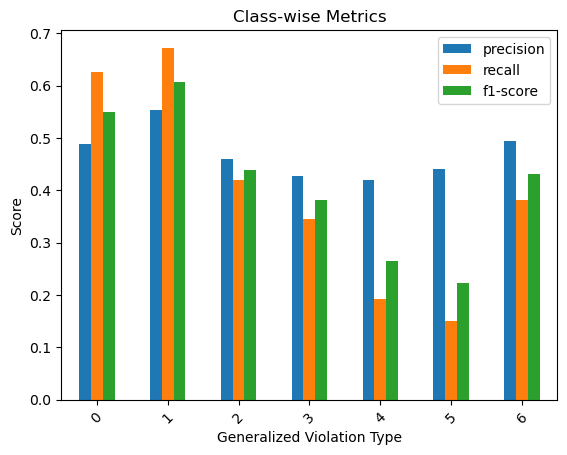

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

# Generate per-class scores as bar chart
random_forest_report_df = pd.DataFrame(random_forest_report).transpose()

random_forest_report_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar')
plt.title('Class-wise Metrics')
plt.ylabel('Score')
plt.xlabel('Generalized Violation Type')
plt.xticks(rotation=45)
plt.show()

plt.savefig("Images/new_random_forest_metrics.png", format="png", dpi=300)

## Logistic Regression Model
All variables must be numeric.

In [ ]:

# Example of encoding categorical variables if they are not numeric
label_encoders = {}
for column in ['LOCATION', 'ISSUE_TIME', 'ISSUING_AGENCY_NAME']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target variable (y)
X = df[['LOCATION', 'ISSUE_TIME', 'ISSUING_AGENCY_NAME']]
y = df['VIOLATION_TYPE_DESC']  # Ensure this is the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.9639907946392311
              precision    recall  f1-score   support

           M       0.00      0.00      0.00         5
           P       0.97      1.00      0.98     28526
           T       0.03      0.03      0.03        80
           V       0.00      0.00      0.00       937

    accuracy                           0.96     29548
   macro avg       0.25      0.26      0.25     29548
weighted avg       0.93      0.96      0.95     29548



/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Decision Tree Classifier Model
"...a supervised machine learning algorithm used for classification tasks. It aims to predict the category or class label of an instance by learning simple decision rules inferred from the data features." -ChatGPT

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
tree = DecisionTreeClassifier()

# Train the model
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.5007864861168103
              precision    recall  f1-score   support

           0       0.49      0.63      0.55      5164
           1       0.55      0.67      0.61     10123
           2       0.46      0.42      0.44      5620
           3       0.43      0.34      0.38      3109
           4       0.42      0.19      0.26      4173
           5       0.44      0.15      0.22       147
           6       0.49      0.38      0.43       908

    accuracy                           0.50     29244
   macro avg       0.47      0.40      0.41     29244
weighted avg       0.49      0.50      0.48     29244



## Improved Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
forest.fit(X_train, y_train)

# Make predictions
y_pred = forest.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.5006839009711394
              precision    recall  f1-score   support

           0       0.49      0.63      0.55      5164
           1       0.55      0.67      0.61     10123
           2       0.46      0.42      0.44      5620
           3       0.43      0.34      0.38      3109
           4       0.42      0.19      0.26      4173
           5       0.44      0.15      0.22       147
           6       0.49      0.38      0.43       908

    accuracy                           0.50     29244
   macro avg       0.47      0.40      0.41     29244
weighted avg       0.49      0.50      0.48     29244



## Support Vector Machine Model

In [28]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.3565175762549583
              precision    recall  f1-score   support

           0       0.58      0.06      0.11      5164
           1       0.36      0.93      0.52     10123
           2       0.28      0.13      0.18      5620
           3       0.00      0.00      0.00      3109
           4       0.00      0.00      0.00      4173
           5       0.00      0.00      0.00       147
           6       0.00      0.00      0.00       908

    accuracy                           0.36     29244
   macro avg       0.17      0.16      0.12     29244
weighted avg       0.28      0.36      0.23     29244



c:\Users\rfqwx\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rfqwx\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rfqwx\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## K Nearest Neighbors Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


KNN Accuracy: 0.4278484475447955
              precision    recall  f1-score   support

           0       0.37      0.62      0.47      5164
           1       0.50      0.60      0.54     10123
           2       0.40      0.29      0.34      5620
           3       0.35      0.28      0.31      3109
           4       0.34      0.14      0.19      4173
           5       0.59      0.07      0.12       147
           6       0.55      0.24      0.33       908

    accuracy                           0.43     29244
   macro avg       0.44      0.32      0.33     29244
weighted avg       0.42      0.43      0.41     29244



## Gradient Boosting Classifier Model
"A supervised machine learning algorithm used for classification tasks. It builds an ensemble of weak learners (typically decision trees) in a stage-wise manner and combines their outputs to make accurate predictions. Boosting is an ensemble method where models are trained sequentially, with each model attempting to correct the errors of its predecessor." - ChatGPT

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gbc = GradientBoostingClassifier()

# Train the model
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gradient Boosting Accuracy: 0.4792436055259198
              precision    recall  f1-score   support

           0       0.49      0.55      0.52      5164
           1       0.50      0.72      0.59     10123
           2       0.45      0.35      0.40      5620
           3       0.46      0.27      0.34      3109
           4       0.40      0.12      0.19      4173
           5       0.37      0.27      0.31       147
           6       0.42      0.56      0.48       908

    accuracy                           0.48     29244
   macro avg       0.44      0.41      0.40     29244
weighted avg       0.47      0.48      0.45     29244

